In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
calendar = pd.read_csv('/content/drive/MyDrive/m5/calendar.csv')
sales_train = pd.read_csv('/content/drive/MyDrive/m5/sales_train_validation.csv')
sell_prices = pd.read_csv('/content/drive/MyDrive/m5/sell_prices.csv')

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
sales_train.isnull().sum().sort_values(ascending=True)

id        0
d_1281    0
d_1280    0
d_1279    0
d_1278    0
         ..
d_628     0
d_627     0
d_626     0
d_638     0
d_1913    0
Length: 1919, dtype: int64

In [ ]:
calendar.isnull().sum().sort_values(ascending=True)

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
snap_CA            0
snap_TX            0
snap_WI            0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
dtype: int64

In [ ]:
sales_train["cat_id"].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [ ]:
sales_train["dept_id"].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [ ]:
sales_train["state_id"].unique()

array(['CA', 'TX', 'WI'], dtype=object)

In [ ]:
sales_train["store_id"].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [ ]:
d_ = [col for col in sales_train.columns if "d_" in col]

total_sales = sales_train.groupby(["cat_id", "dept_id"])[d_].sum()
total_sales = pd.DataFrame(total_sales.sum(axis=1)).reset_index().rename({0:"sales"}, axis=1)

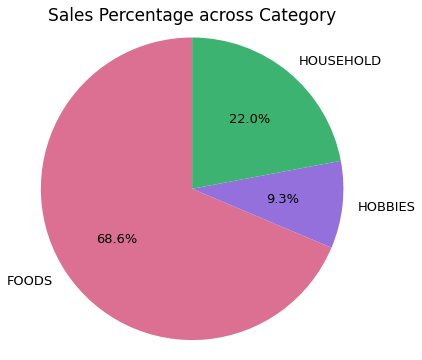

In [ ]:
cat_percent = pd.DataFrame(total_sales.groupby(["cat_id"])["sales"].sum().reset_index())
colors = ['palevioletred', 'mediumpurple', 'mediumseagreen']

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(cat_percent["sales"], labels=cat_percent["cat_id"], autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 13})
ax.axis('equal')
plt.title("Sales Percentage across Category", fontsize=17)
plt.show()

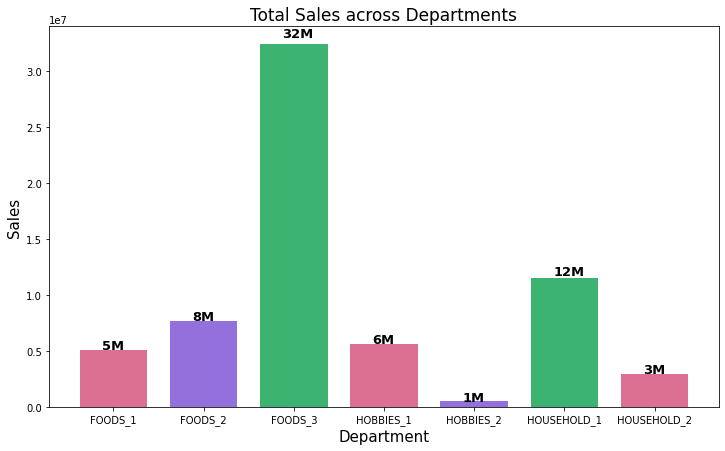

In [ ]:
colors = ['palevioletred', 'mediumpurple', 'mediumseagreen']

plt.subplots(figsize=(12,7))
bar = plt.bar(total_sales["dept_id"], total_sales["sales"], width=0.75, color=colors)

sales = total_sales["sales"].tolist()

i = 0
for c in bar:
    width = c.get_width()
    height = c.get_height()
    x, y = c.get_xy()
    plt.text(x + width/3, y + height * 1.02, str(round(sales[i] / 1000000)) + "M", fontsize=13, fontweight="bold")
    i += 1

plt.title("Total Sales across Departments", fontsize=17)
plt.ylabel("Sales", fontsize=15)
plt.xlabel("Department", fontsize=15)
plt.show()

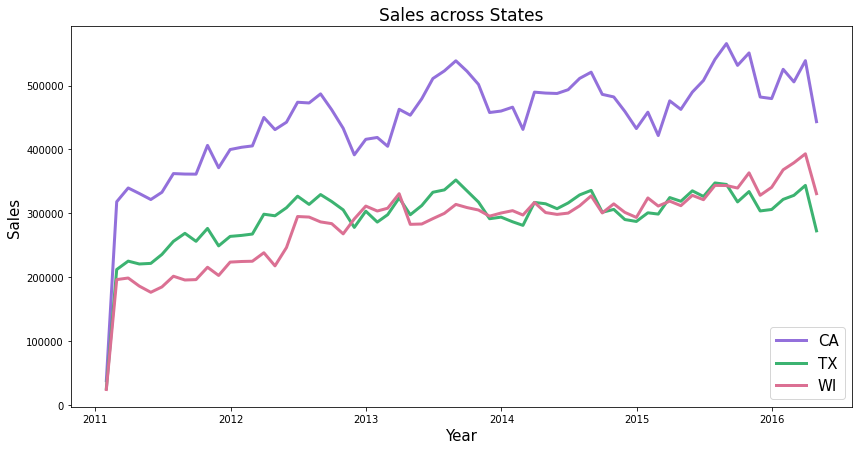

In [ ]:
state_sales = sales_train.groupby("state_id")[d_].sum().T\
                        .merge(calendar.set_index("d"), how="left", left_index=True,
                         right_index=True, validate="1:1").loc[:, ["CA","WI","TX","date"]]
state_sales["date"] = pd.to_datetime(state_sales["date"])
state_sales = state_sales.set_index("date").resample("1m").sum()

plt.subplots(figsize=(14, 7))
plt.plot(state_sales["CA"], label="CA", color='mediumpurple', linewidth=3)
plt.plot(state_sales["TX"], label="TX", color='mediumseagreen', linewidth=3)
plt.plot(state_sales["WI"], label="WI", color='palevioletred', linewidth=3)
plt.legend(loc="lower right", prop={'size': 15})
plt.title("Sales across States", fontsize=17)
plt.ylabel("Sales", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.show()

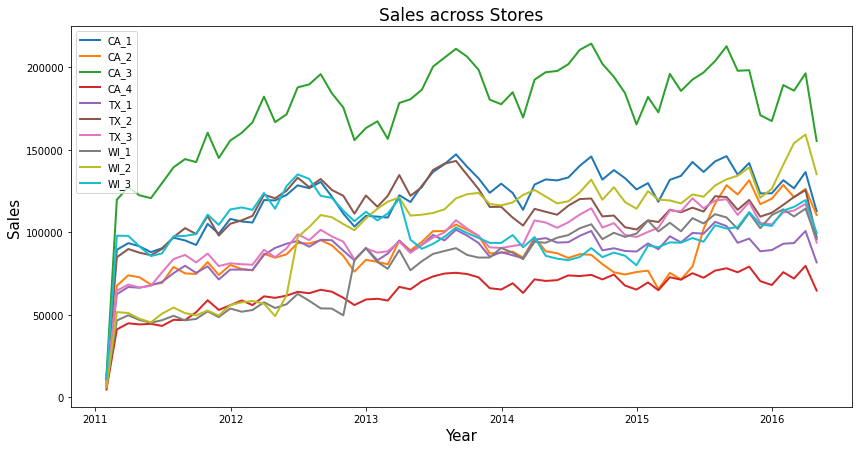

In [ ]:
store_sales = sales_train.groupby("store_id")[d_].sum().T\
                    .merge(calendar.set_index("d"), how="left", left_index=True,
                    right_index=True, validate="1:1").loc[:, "CA_1":"date"]
store_sales["date"] = pd.to_datetime(store_sales["date"])
store_sales = store_sales.set_index("date").resample("1m").sum()

plt.subplots(figsize=(14, 7))

store = list(store_sales.columns.values)

for i in range(10):
    plt.plot(store_sales[store[i]], label=store[i], linewidth=2)

plt.legend(loc="upper left")
plt.title("Sales across Stores", fontsize=17)
plt.ylabel("Sales", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.show()

In [ ]:
stv = pd.DataFrame(sales_train[d_].T.sum(axis=1)).rename({0:"sales"}, axis=1)\
                    .merge(calendar.set_index("d"), how="left", left_index=True,
                    right_index=True, validate="1:1")

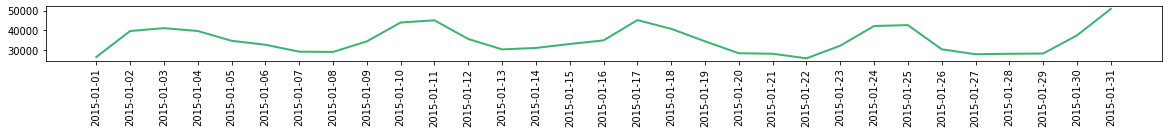

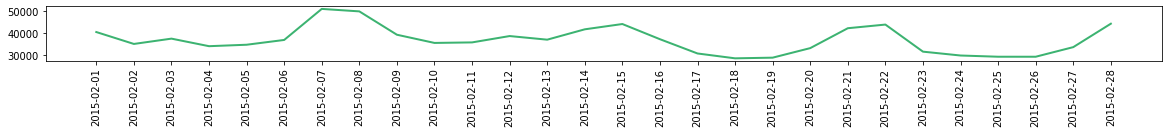

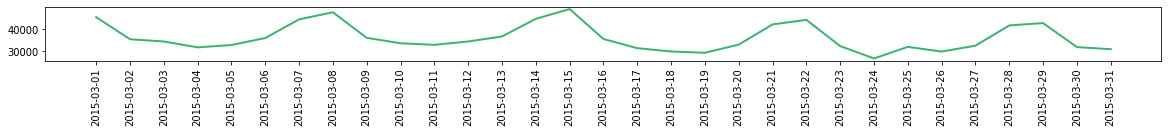

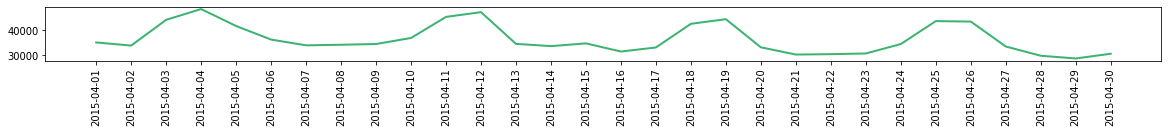

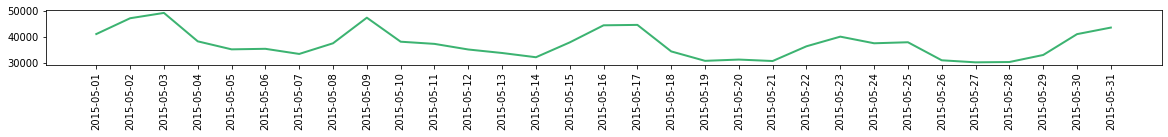

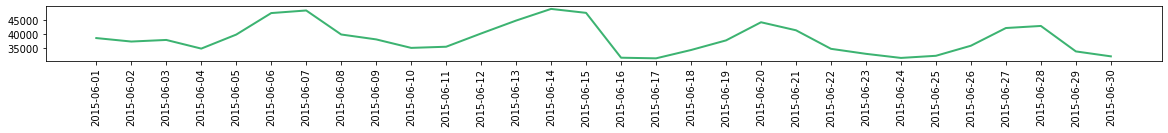

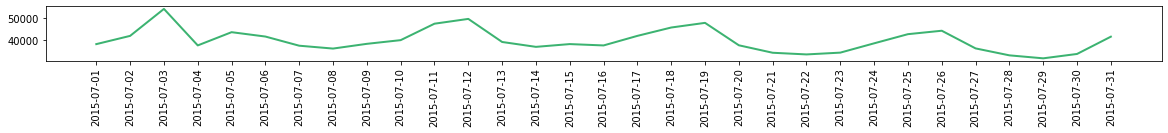

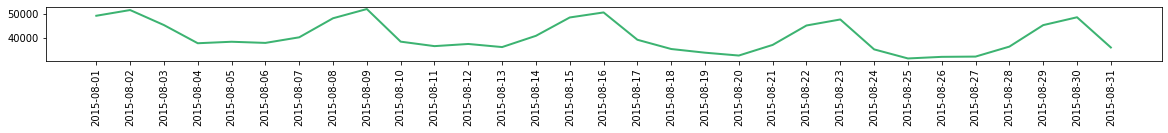

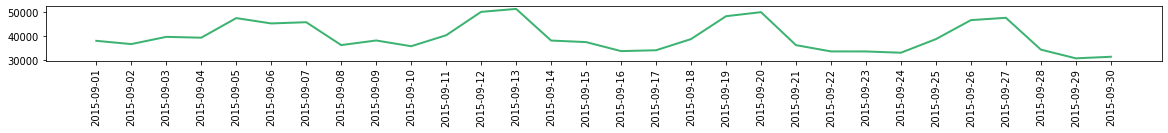

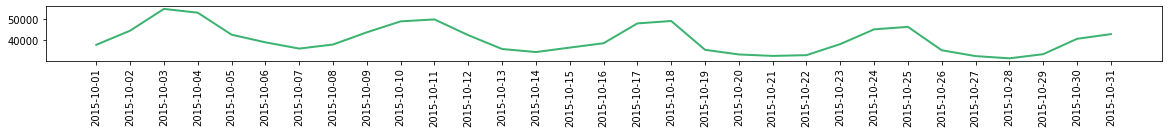

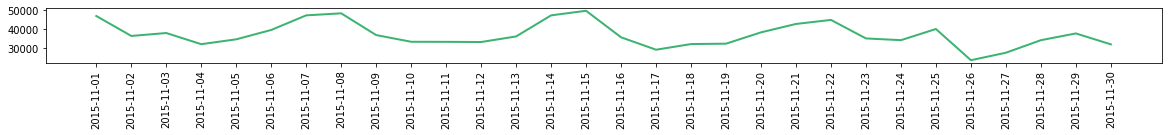

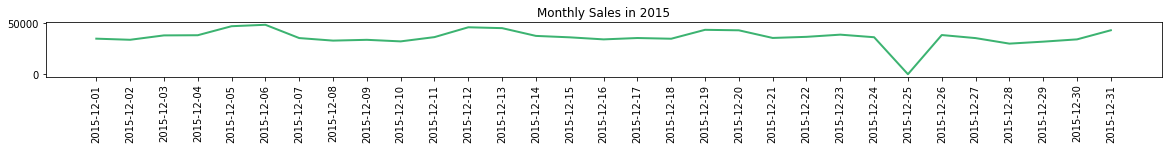

In [ ]:
m = []

for i in range(12):
    mi = stv[(stv['month']==i) & (stv['year']==2015)].set_index('date')

month = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12]

for i in range(12):
    plt.subplots(figsize=(20, 1))
    plt.plot(month[i]["sales"], color='mediumseagreen', linewidth=2)
    plt.xticks(rotation = 90)

plt.title("Monthly Sales in 2015")
plt.show()

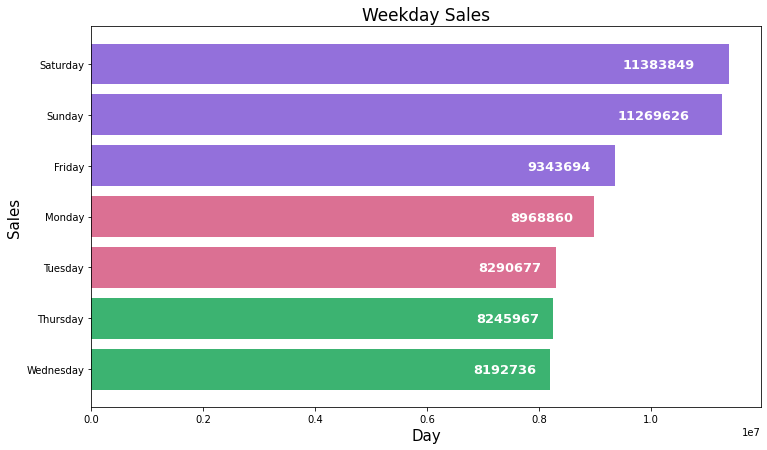

In [ ]:
weekday = stv.groupby(["weekday"])["sales"].sum()
weekday = pd.DataFrame(weekday).reset_index().sort_values(by=['sales'])
colors = ['mediumseagreen', 'mediumseagreen', 'palevioletred', 'palevioletred', 'mediumpurple', 'mediumpurple', 'mediumpurple']

plt.subplots(figsize=(12,7))
bar = plt.barh(weekday["weekday"], weekday["sales"], color=colors)

sales = weekday["sales"].tolist()

i = 0
for c in bar:
    width = c.get_width()
    height = c.get_height()
    x, y = c.get_xy()
    plt.text(x + width / 1.2, y + height * 0.4, sales[i], fontsize=13, color="white", fontweight="bold")
    i += 1

plt.title("Weekday Sales", fontsize=17)
plt.ylabel("Sales", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.show()

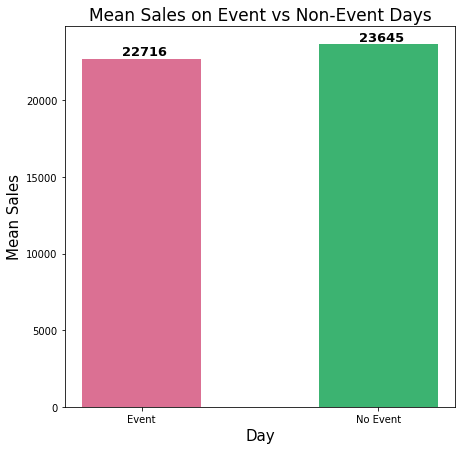

In [ ]:
event = sales_train.groupby("cat_id")[d_].sum().T\
                    .merge(calendar[["date","d","event_type_1"]].set_index("d"), how="left", left_index=True,
                    right_index=True, validate="1:1")

event = event.drop(columns=['HOBBIES', 'HOUSEHOLD'])

event["event_type_1"] = event.event_type_1.map({'Sporting':"Event", 'Cultural':"Event", 'National':"Event", 'Religious':"Event"})
event.event_type_1.fillna("No Event", inplace=True)

event_ = event.melt(id_vars=["date","event_type_1"], var_name='category',value_name="sales")
event_ = event_.groupby(["category","event_type_1"])["sales"].mean().reset_index()

plt.subplots(figsize=(7,7))
bar = plt.bar(event_["event_type_1"], event_["sales"], width=0.5, color=['palevioletred', 'mediumseagreen'])

sales = event_["sales"].tolist()

i = 0
for c in bar:
    width = c.get_width()
    height = c.get_height()
    x, y = c.get_xy()
    plt.text(x + width/3, y + height * 1.01, round(sales[i]), fontsize=13, fontweight="bold")
    i += 1

plt.title("Mean Sales on Event vs Non-Event Days", fontsize=17)
plt.ylabel("Mean Sales", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.show()